![Curso de Visión Artificial](imagenes/encabezado.png)



# Introducción a Scikit-Image

``Scikit-image`` es un toolbox de Python que tiene implementados diferentes algoritmos para la manipulación y procesamiento de imágenes digitales. Para más información consulte:

http://scikit-image.org/




# Imágenes: arreglos NumPy

La base de la Visión Artificial con las imágenes digitales, de ahí la importancia en que tomemos un tiempo en aprender a manipularlas.

Como en otros lenguajes de programación las imágenes se representan en Python, y específicamente en ``scikit-image`` como arreglos bidimensionales de ``NumPy``. Esto facilita la interoperabilidad de `` scikit-image`` con otras bibliotecas en el ecosistema de Python, como ``matplotlib`` y ``scipy``.

Para iniciar, importamos las bibliotecas que requerimos. En este caso:
* <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> numpy:</span> es la biblioteca para la manipulación de matrices y arreglos en Python.
* <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> matplotlib:</span> es la biblioteca para la creación y manipulación de gráficos. De esta biblioteca vamos a usar solamente el paquete <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> pyplot</span>.
* <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> skimage:</span> es la biblioteca para la manipulación de imágenes digitales. En este caso estamos usando el paquete <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> data</span> que tiene algunas imágenes pre-cargadas que se utilizan comunmente en procesamiento de imágenes y el paquete <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> io</span> que tiene las funciones para leer y escribir imágenes en disco.

Ahora importemos dichas bibliotecas y paquetes en Python:

In [2]:
# Siempre que usemos matplotlib en Jupyter es necesario poner esta línea antes de cualquier otra
%matplotlib inline

# Importamos las bibliotecas necesarias y les asigamos un alias
import skimage                           # Biblioteca para la manipulación de imágenes
import numpy as np                       # Biblioteca para la manipulación de matrices

# Importamos algunos paquetes específicos
from matplotlib import pyplot as plt     # Biblioteca para crear graficas y mostrar las imágenes en pantalla
from skimage import data                 # Paquete con imágenes de prueba
from skimage import io                   # Paquete para lectura/escritura de imágenes

Como ejemplo básico, partimos de una matriz que representa un tablero de ajedrez, como el de la práctica anterior.  Dicha matriz no es más que una imagen en blanco y negro. En este caso, el blanco está representado por el valor 255 y el negro por el valor 0.

In [3]:
# Se crea el tablero de ajedrez. Note que el tipo de dato es ENTERO SIN SIGNO DE 8 BITS
tablero = np.zeros((8, 8), dtype='uint8')
tablero[::2, 1::2] = 255
tablero[1::2, ::2] = 255

Ahora procedemos a mostrar la matriz usando el comando <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> print</span>: 

In [4]:
# Se muestra la matriz numérica
print (tablero)

[[  0 255   0 255   0 255   0 255]
 [255   0 255   0 255   0 255   0]
 [  0 255   0 255   0 255   0 255]
 [255   0 255   0 255   0 255   0]
 [  0 255   0 255   0 255   0 255]
 [255   0 255   0 255   0 255   0]
 [  0 255   0 255   0 255   0 255]
 [255   0 255   0 255   0 255   0]]


El comando <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> print</span> nos permite ver el contenido numérico de la matriz, sin embargo para ver la matriz como una imagen usamos el comando <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> plt.imshow</span>.

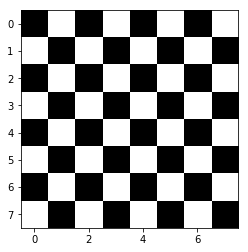

In [5]:
# Se visualiza la imagen que representa la matriz
plt.imshow(tablero, cmap='gray')

<div style="padding:10px; border-radius:10px; border:2px solid #A43D39; background:#EEEEEE">
<span style="color:#A43D39"><h3>**Nota:**</h3></span> observe que la función <span style="color:blue; font-family:Courier new"> imshow</span> recibe un parámetro denominado ``cmap``. Este parámetro se debe usar para indicar a Python cual es la paleta de colores que debe usar para visualizar una imagen. En este caso usamos un mapa denominado ``gray`` para mostrar la imagen usando una escala de grises. </div>

Ahora probemos con una imagen generada de manera aleatoria:


In [ ]:
# Se genera una matriz de 500x500 con contenido aleatorio
random_img = np.random.random([500, 500])
#print(random_img)
# Se muestra la imagen usando imshow
plt.imshow(random_img, cmap='gray')

# Para efectos de visualziación agregamos el mapa de color (o la paleta de color)
plt.colorbar();



## Los Tipos de datos de una imagen

Dependiendo de la resolución en profundidad de la imagen, los tipos de datos de una imagen pueden ser los siguientes:

**Tipo Lógico:**
* <span style="color:green; font-family:Courier new">boolean</span>: Es una imagen en el que cada pixel se representa usando 1 bit, por esta razón la imagen en blanco y negro, donde `Flase`= negro, `True`= blanco

**Tipos Enteros:**
* <span style="color:green; font-family:Courier new">uint8</span>: Es una imagen en la que cada pixel se representa unsado 8 bits, por lo que los píxeles toman valores entre 0 y 255
* <span style="color:green; font-family:Courier new">uint16</span>: Es una imagen en la que cada pixel se representa unsado 16 bits, en este caso los píxeles toman valores entre 0 y 65535

**Tipo Real:**
* <span style="color:green; font-family:Courier new">float</span>: es una imagen de 64 bits en la que los píxeles toman valores entre 0 y 1.

Para las imágenes de tipo `int` y `float` el 0 representa el color negro y el máximo valor posible (255, 65535 o 1) representan el color blanco.


<div style="padding:10px; border-radius:10px; border:2px solid #A43D39; background:#EEEEEE">
<span style="color:#A43D39"><h3>**Nota:**</h3></span> para conocer el tipo de dato de una imagen (o una matriz) ``numpy`` usamos de la propiedad <span style="color:blue; font-family:Courier new"> dtype</span>. </div>

Veamos los tipos de datos de las dos imágenes que visualizamos anteriormente:

In [ ]:
# Imagen del tablero de ajedrez
print ("Imagen del tablero de ajedrez: ", tablero.dtype)
print ("Imagen aleatoria: ", random_img.dtype)

Ahora, usemos una de las imágenes de prueba de Scikit-Image. Es aquí donde usamos el paquete <span style="color:blue; font-family:Courier new"> data</span> de <span style="color:blue; font-family:Courier new"> skimage</span>. Analice la información que se muestra y las funciones que usamos para mostrar dicha información.

In [ ]:
# Cargamos una de las imágenes predefinidas en Scikit-Image
coins = data.coins()

# Mostramos su información
print('Tipo:', type(coins))
print('Tipo NumPy:', coins.dtype)
print('Dimensiones:', coins.shape)

# Mostramos la imagen
plt.imshow(coins, cmap='gray');

<div style="padding:10px; border-radius:10px; border:2px solid #A43D39; background:#EEEEEE">
<span style="color:#A43D39"><h3>**Importante:**</h3></span> observe que las imágenes con las que hemos trabajado hasta el momento son imágenes en **escala de grises**. Estas son simples matrices o arreglos en 2D. No obstante, cuando trabajamos con imágenes a color, la imagen se representa como un arreglo 3D (o un cubo), tal que la tercera dimensión representa los canales de la imagen. </div>

Usemos ahora una imagen llamada ``chelsea`` del repositorio de ``Scikit-image``. Esta imagen es a color, así que preste atención a la información de la misma.

In [ ]:
# Cargamos una de las imágenes predefinidas en Scikit-Image 
cat = data.chelsea()

# Visualizamos la información de la imagen, incluídos el valor max y min
print('Tipo:', type(cat))
print('Tipo NumPy:', cat.dtype)
print("Dimensiones:", cat.shape)
print("Valor min:", cat.min())
print("Valor max:", cat.max())

# Mostramos la imagen
plt.imshow(cat);

<div style="padding:10px; border-radius:10px; border:2px solid #4BACC6; background:#EEEEEE">
<span style="color:#4BACC6" ><h3>**Para Tener en Cuenta:**</h3></span> Las imágenes pueden convertirse a diferentes tipos de datos usando las funciones que están en skimage: <span style="color:blue; font-family:Courier new"> img_as_float</span>, <span style="color:blue; font-family:Courier new">img_as_uint</span>, <span style="color:blue; font-family:Courier new">img_as_bool</span>, etc. <br/><br/>

Esto es importante puesto que algunas funciones trabajan con unos tipos de imágenes u otros no soportan  todos los tipos de datos de imágenes. </div>

In [ ]:
cat_ubyte = skimage.img_as_ubyte(cat)

print('\ncat_ubyte\nTipo NumPy:', cat_ubyte.dtype)
print("Valor min:", cat_ubyte.min())
print("Valor max:", cat_ubyte.max())

# Convierte la imagen a una representación usando float
cat_float = skimage.img_as_float(cat)
print('\n\ncat_float\nTipo NumPy:', cat_float.dtype)
print("Valor min:", cat_float.min())
print("Valor max:", cat_float.max())

<div style="padding:10px; border-radius:10px; border:2px solid #4BACC6; background:#EEEEEE">
<span style="color:#4BACC6"><h3>**Para Tener en Cuenta:**</h3></span> Como una imagen no es más que una matriz o un arreglo de matrices tipo ``NumPy``, es importante que usted sepa que puede aplicar a una imagen cualquier operación disponible en la biblioteca de `NumPy`.</div>

## Accediendo a los pixeles de la imagen

Como una imagen es una matriz usted puede manipular los valores de dicha matriz para hacer cambios en la imagen. La forma de hacer esto es simplemente usando los índices de las filas y las columnas que quiere alterar. Por ejemplo, hagamos un cuadrado de color rojo en la imagen:

In [ ]:
# En la imagen, de la fila 10 a la fila 110 (dimensión 0 del arreglo 3D)
# En la imagen, de la columna 210 a la columna 310 (dimensión 1 del arreglo 3D)
# En los 3 canales (RGB) se asigna la tripleta 255, 0, 0: máximo valor al canal rojo y mínimo valor al azul y verde
cat[10:150, 210:310, 0] = 255  # Asigne el valor 255 a los píxeles en el canal rojo
cat[10:150, 210:310, 1] = 0   # Asigne el valor 0 a los píxeles en el canal verde
cat[10:150, 210:310, 2] = 0 # Asigne el valor 0 a los píxeles en el canal azul

plt.imshow(cat);

Recuerde que para una imagen a color se deben usar tres índices que en su orden son: filas, columnas y canales, así la instrucción: 

<span style="font-family:Courier new">cat[<span style="color:#4BACC6">10:110</span>, <span style="color:#FF4D4D">210:310</span>, <span style="color:#6D00D9">0</span>] = 255</span>

Está accediendo a los píxeles tales que están:
* Entre las <span style="color:#4BACC6">filas</span> 10 y 110 (excluida esta última)
* Entre las <span style="color:#FF4D4D">columnas</span> 210  y 310 (excluida esta última)
* En el <span style="color:#6D00D9">canal</span> 0, que en el formato RGB es el canal Rojo



## Visualizando una imagen en pantalla

Como hemos visto de los ejemplos anteriores, para mostrar una imagen se usa el comando <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> imshow</span> de la biblioteca de <span style="color:blue; font-family:Courier new"> matplotlib</span>. Veamos una variación de este comando.



In [ ]:
# Cargamos la imagen chelsea en la variable img0
img0 = data.chelsea()

# Cargamos la imagen rocket en la variable img1
img1 = data.rocket()

Comúnmente debemos mostrar más de una imagen en pantalla al tiempo para poderlas comparar. Para hacer esto debemos usar subplots a fin de dividir la pantalla en una grilla y mostrar en cada celda una imagen.

En el ejemplo siguiente usamos la función <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> subplot</span>, del paquete <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> pyplot</span>, para mostrar las dos imágenes que cargamos recientemente:

In [ ]:
# La función subplots divide el espacio de la figura en subfiguras
# Los dos primeros parámetros que usamos aquí son el número de filas y columnas del subplot
# el tercer parámetro, figsize, es un parámetro que define el tamaño relativo de los subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Se muestra en el primer subplot la imagen 0, se le asigna un título y se eliminan los ejes del gráfico
ax[0].imshow(img0)
ax[0].set_title('Cat', fontsize=18)
ax[0].axis('off')

# Se muestra en el segundo subplot la imagen 1, se le asigna un título y se pone el nombre al eje X
ax[1].imshow(img1)
ax[1].set_title('Rocket', fontsize=18)
ax[1].set_xlabel(r'Launching position $\alpha=320$')

<div style="padding:10px; border-radius:10px; border:2px solid #9BBB59;">
<span style="color:#9BBB59"><h3>**Hazlo tu mismo!**</h3></span> 
1. Carga en una variable llamada <span style="background-color:#DDDDDD; color:blue; font-family:Courier new">img2</span> la imagen coffee del repositorio de imágenes de skimage<br/>
2. Carga en una variable llamada <span style="background-color:#DDDDDD; color:blue; font-family:Courier new">img3</span> la imagen camera del repositorio de imágenes de skimage<br/>
3. Crea un subplot para mostrar las 4 imágenes en una grilla de 2 filas y dos columnas<br/>
4. Muestre las imágenes, eliminando los ejes de los gráficos y poniendo un título a cada una de ellas. Tenga presente que la imagen camera es en niveles de gris!
</div>

In [ ]:
# 1. Cargue la imagen coffee en la variable img2 
img2 = data.coffee()

# 2. Cargue la imagen camera en la variable img3 
img3 = data.camera()

# 3. Cree el subplot requerido
f, al = plt.subplots(2, 2, figsize=(15 ,5))

# 4a. Elimine los ejes de todos los subplots

al[0,0].axis('off')
al[0,1].axis('off')
al[1,0].axis('off')
al[1,1].axis('off')

# 4b. Ponga el título a cada subplot
al[0,0].set_title('Cat', fontsize=18)
al[0,1].set_title('Network', fontsize=18)
al[1,0].set_title('Coffee', fontsize=18)
al[1,1].set_title('Camera', fontsize=18)

# 4c. Muestre cada imagen en un subplot
al[0,0].imshow(img0)
al[0,1].imshow(img1)
al[1,0].imshow(img2)
al[1,1].imshow(img3)

**Nota:** Para más información sobre como manejar figuras y subfiguras revise la [Documetación de Matplotlib](https://matplotlib.org/gallery/index.html#images-contours-and-fields) y [pyplot API](https://matplotlib.org/api/pyplot_summary.html).

## Operaciones de Lectura/Escritura de Imágenes

Las operaciones de lectura y escritura de imágenes son esenciales para cualquier proyecto de Visión Artificial. Esto se debe a que, en general, no usaremos las imágenes de los conjuntos de datos de ejemplo de `scikit-image` sino que podremos usar imágenes en diferentes formatos como BMP, JPEG o PNG. Las funciones del paquete <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> io</span> de Scikit-image  incluyen funciones de otras bibliotecas como `imageio`, `matplotlib`, `almohada`, etc.


Empecemos con lo básico, para leer una imagen de disco usamos la función <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> io.imread</span>. En su expresión más simple, la función recibe la ruta en disco o la URL de la imagen que queremos leer.

In [ ]:
# Así de fácil se lee una imagen de disco
img = io.imread("imagenes/img1.jpg")

print('Información de la Imagen:')
print('Tipo:', type(img))
print('Tipo de dato:', img.dtype)
print("Dimensiones:", img.shape)
print("Valor min:", img.min())
print("Valor max:", img.max())

plt.imshow(img)
plt.axis('off')

Note que en el ejemplo anterior usamos las funciones <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> max</span> y <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> min</span>. Estas nos permiten conocer cuáles son los niveles de intensidad máximo y mínimo de en toda la imagen. ¿Cómo obtenemos el valor de máxima intensidad del canal rojo y el valor de mínima intensidad del canal verde?

In [ ]:
# Obtenga y muestre el valor de máxima intensidad del canal rojo de la imagen img
R = img[:,:,0].max()
print(R)

# Obtenga y muestre el valor de mínima intensidad del canal verde de la imagen img
G = img[:,:,1].min()
print(G)


Una funcionalidad adicional consiste en cargar múltiples imágenes que están en un directorio. Vea cómo hacerlo en el siguiente ejemplo:


In [ ]:
# Se leen todas las imágenes con extensión JPG
ic = io.ImageCollection('imagenes/*.jpg')

print('Type:', type(ic))
#print(ic.files)


print("Cantidad de imágene leídas: ", len(ic))


In [ ]:
# Para mostrar la colección de imágenes requerimos un paquete para administrar los comando del sistema operativo
import os

# Se crea el subplot. Note que son 3 columnas, pero el número de filas depende del número de imágenes
f, axes = plt.subplots(ncols=3, nrows=len(ic) // 3, figsize=(20,15))

# La función ravel se usa para aplanar el arreglo y tratarlo como un arreglo 1D. Esto facilita el uso de ciclos
axes = axes.ravel()
#print(axes)
# Se eliminan los ejes de cada subplot
for ax in axes:
    ax.axis('off')


# Se muestra cada imagen y se le agrega un título
for i,image in enumerate(ic):
    axes[i-1].imshow(image, cmap='gray')
    axes[i-1].set_title(os.path.basename(ic.files[i]))


Además de leer una imagen, en los proyectos de visión también se hace necesario almacenar una imagen que es el resultado de una operación. Para ello usamos el comando <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> io.imsave</span>, tal como lo hacemos a contionuación:

In [ ]:
# Modificamos la imagen en la variable img
# La modificación consiste en dibujar un cuadro verde 100x100 en el centro de la imagen
w,h,c = img.shape
print(w,h,c)

img[w//2-50:w//2+50, h//2-50:h//2+50, :] = [0, 255, 0]

plt.imshow(img)
plt.axis('off')

io.imsave('imagenes/img1_modificada.jpg', img)


# Entregables de la Práctica


### Ejercicio 1. Convirtiendo una imagen a niveles de gris

Defina una función que tome como entrada una imagen RGB o RGBA y retorne una versión en niveles de gris de dicha imagen. 
La imagen de salida debe ser del mismo tipo de la imagen de entrada, además, si la imagen que se recibe como parámetro de entrada es una imagen de un solo canal, la función debe retornar la imagen original.

Para la conversión debe usar la siguiente función:

<span style="font-family:Courier new; text-align:center">Y = 0.2125*R + 0.7154*G + 0.0721*B</span>

Comience con la siguiente plantilla:

In [4]:
# Función que convierte a niveles de gris una imagen.
def rgb2gray(imgInput):
    print('_______________________________________\n')
    print('Type input image ===> ',imgInput.dtype)
    
    # Obtiene las dimensiones de la imagen
    d = imgInput.shape
    print('Dimentions image: ',d)
    print('Quantity of channels: ',len(d))
    
    # Genera la imagen incial de salida
    imgOutput = np.zeros((d[0], d[1]), dtype = imgInput.dtype)
  
    # De acuerdo al número de canales de la imagen haga
    if len(d) <= 2: 
        return imgInput
    else:
        # Implemente su código aquí
        imgOutput = np.dot(imgInput[...,:3], [0.2125,0.7154,0.0721])
        imgOutput = imgOutput.astype(imgInput.dtype)
    print('Type output image ===> ',imgOutput.dtype)
    print('_______________________________________')
    return imgOutput 



Pruebe la función usando las imágenes <span style="font-family:Courier new;">img7.jpg</span> e <span style="font-family:Courier new;">img3.png</span>

_______________________________________

Type input image ===>  uint8
Dimentions image:  (803, 600, 3)
Quantity of channels:  3
Type output image ===>  uint8
_______________________________________


(-0.5, 599.5, 802.5, -0.5)

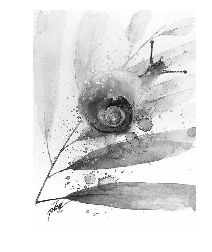

In [5]:
%matplotlib inline
import skimage

import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
from skimage import io

# Cargue la imagen img7.jpg de la carpeta imagenes de esta práctica
#img7 = mpimg.imread('imagenes/img7.jpg') 
img7 = io.imread('imagenes/img7.jpg')
# Se invoca la función recientemente implementada
out_img7 = rgb2gray(img7)  
#print(type(out_img7))
# Muestre la imagen de salida  
plt.imshow(out_img7, cmap = 'gray')
plt.axis("off")


In [ ]:
# Cargue la imagen img3.png de la carpeta imagenes de esta práctica
img3 = io.imread('imagenes/img3.png') 

# Se invoca la función recientemente implementada
out_img3 = rgb2gray(img3)

# Muestre la imagen de salida
plt.imshow(out_img3, cmap = 'gray')
plt.axis('off')

In [ ]:
# Cargue la imagen img4.jpg de la carpeta imagenes de esta práctica
img4 = io.imread('imagenes/img4.jpg') 

# Se invoca la función recientemente implementada
out_img4 = rgb2gray(img4)

# Muestre la imagen de salida
plt.imshow(out_img4, cmap = 'gray')
plt.axis("off")

### Ejercicio 2. Descomponiendo una imagen a color en sus canales

Desrrolle una función que permita visualizar una imagen a color, así como cada uno de sus canales RGB. La función debe recibir como parámetro una imagen y retornar los tres canales RGB.

Un ejemplo de como debe mostrar las imágenes la función se da a continuación.




In [12]:
# Función que muestra una imagen a color y sus canales RGB.
def displayRGB(img):
    
    # Obtiene las dimensiones de la imagen
    d = img.shape
    
    # De acuerdo al número de canales de la imagen haga
    if len(d) == 2: 
        # ¿Qué hacer si la imagen es en niveles de gris?
        r = img[:,:]
        g = img[:,:]
        b = img[:,:]
    else:
        # Separe cada canal de la imagen
        r = img[:,:,0]
        g = img[:,:,1]
        b = img[:,:,2]
        
    # Muestre la imagen a color y cada uno de los canales en un subplot de 1x4
    f, axes = plt.subplots(1, 4, figsize=(16, 5))
    
    # Se usa la función ravel para obtener todos los subplot como una lista
    axes = axes.ravel()
    

    # Se eliminan los ejes de cada subplot
    for ax in axes:
        ax.axis('off')

    
    # Se muestra cada imagen y se le agrega un título
    # Recuerde que axes es ahora un arreglo de subplots
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('NORMAL', fontsize=15)
    if len(d) > 2:
        for i in range(len(d)):
            axes[i+1].imshow(img[:,:,i], cmap='gray')
            if i == 0:
                axes[i+1].set_title('RED', fontsize=15)
            elif i == 1:
                axes[i+1].set_title('GREEN', fontsize=15)
            elif i == 2:
                axes[i+1].set_title('BLUE', fontsize=15)
    
        
    return r, g, b

Pruebe la función usando la imagen <span style="font-family:Courier new;">img3.png</span> y la imagen <span style="font-family:Courier new;">img4.jpg</span>.

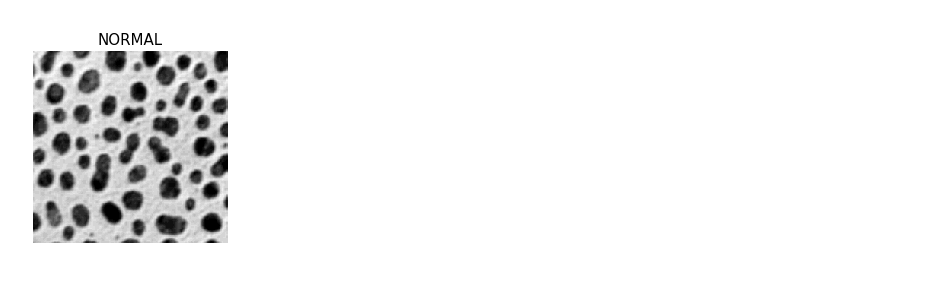

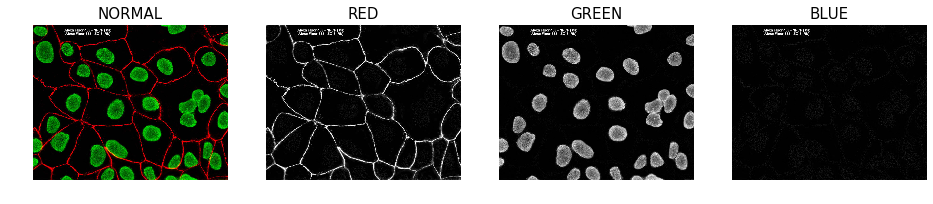

In [13]:
# Cargue la imagen img3.png de la carpeta imagenes de esta práctica
img3 = io.imread('imagenes/img3.png')


# Se invoca la función recientemente implementada
r,g,b = displayRGB(img3)


# Cargue la imagen img4.jpg de la carpeta imagenes de esta práctica
img4 = io.imread('imagenes/img4.jpg')


# Se invoca la función recientemente implementada
r,g,b = displayRGB(img4)

### Ejercicio 3. Componer una imagen a color a partir de imagenes en niveles de gris

Dadas las tres imágenes en niveles de gris de abajo, combinelas para formar una imagen a color. Muestre dicha imagen.

In [ ]:
from skimage import draw
import cv2

# Se crean las tres imágenes con ceros
R = np.zeros((300, 300))
G = np.zeros((300, 300))
B = np.zeros((300, 300))

# Se dibujan los círculos en las tres imágenes
r, c = draw.circle(100, 100, 100)
R[r, c] = 1

r, c = draw.circle(100, 200, 100)
G[r, c] = 1

r, c = draw.circle(200, 150, 100)
B[r, c] = 1

# Se muestran las tres imágenes en un subplot
f, axes = plt.subplots(1, 3)
for (ax, channel) in zip(axes, [R, G, B]):
    ax.imshow(channel, cmap='gray')
    ax.axis('off')

In [ ]:
# Cree una matriz de ceros de tamaño 300x300 con 3 canales
rgb = np.zeros((300,300,3), dtype='uint8')

# Asigne a cada canal de la matriz anterior las variables R, G y B respectivamente
rgb = cv2.merge((R,G,B));

# Muestre la imagen creada
plt.imshow(rgb, cmap='gray')

### Ejercicio 4. Manipulando los píxeles de una imagen

Desarrolle una función que dada una imagen a color retorne una imagen en el que en cada cuadrante se pinte con la información de cada uno de los canales RGB. El cuato cuadrante se debe manetener con la información a color de la imagen.

Como ejemplo, la imagen a continuación muestra la imagen de entrada y lo que se espera que sea la imagen de salida.

![Imagen_Ejercicio_4](imagenes/Ejercicio4.png)


In [8]:
# Función que muestra una imagen a color y sus canales RGB.
def composeRGB(img):
    
    # Se crea la imagen de salida
    out = img.copy()
    
    dim = out.shape
    
    dim_rows = int(dim[0]/2)
    dim_cols = int(dim[1]/2)
    
    out[:dim_rows,:dim_cols,1:3] = 0
    out[:dim_rows,dim_cols:,[0,2]] = 0
    out[dim_rows:,:dim_cols,0:2] = 0
    
    return out

Pruebe la función usando la imagen <span style="font-family:Courier new;">img5.jpg</span>.


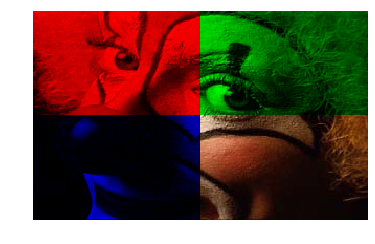

In [9]:
# Cargue la imagen img5.jpg de la carpeta imagenes de esta práctica
img5 = io.imread('imagenes/img5.jpg')

# Se invoca la función recientemente implementada
out_img5 = composeRGB(img5)

# Muestre la imagen de salida
plt.imshow(out_img5)
plt.axis('off')

# Almacene en el disco la imagen en disco
io.imsave('imagenes/output_image.jpg',out_img5)
